In [1]:
#pip install datapackage

In [1]:
import csv
import requests
import pandas as pd 
import io
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import time
import datapackage
import sklearn.linear_model as lm

In [17]:
path = 'cy_data'
pathToSave = 'diagrams/{}.png'
dir_list = sorted(os.listdir(path))
data  = list() # a list of dataframes containing all data from all cryp

digital_currency_list = 'digital_currency_list.csv'
currencies = pd.read_csv(digital_currency_list) 

In [3]:
data, currencies_list, errors, notes, shit = list(), list(), list(), list(), list()
for d in dir_list: 
    #df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    df = pd.read_csv('{}/{}'.format(path, d))
    #print(d)
    if df.size == 0:
        print('Empty: {}'.format(d))
    elif '20' in df.iat[0, 1]:
        data.append(df)
        currencies_list.append(d.split(".")[0])
        #print('Yeah data')
    elif 'Error' in df.iat[0, 1]:
        errors.append(d.split(".")[0])
    elif 'Note' in df.iat[0, 1]:
        notes.append(d.split(".")[0])
    else:
        print('Crazy shit is happening with {}'.format(d))
        shit.append(df)
        
data[0].head()
print('--------Number of data: {}'.format(len(data)))   
#data[0].head()
print('--------Number of errors: {}'.format(len(errors)))  
#print(errors)
print('--------Number of notes: {}'.format(len(notes)))  
#print(notes)
print('--------Number of shit: {}'.format(len(shit)))  
#print(shit)

Empty: SPC.csv
--------Number of data: 106
--------Number of errors: 462
--------Number of notes: 0
--------Number of shit: 0


In [5]:
rel_data = data.copy() 
for d in rel_data: 
    start = d.iat[0, 2]
    #df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    d['open (USD)'] /= start
    d['high (USD)'] /= start
    d['low (USD)'] /= start
    d['close (USD)'] /= start
    d['spread'] = d['high (USD)'] - d['low (USD)']
rel_data[0]

,Unnamed: 0,timestamp,open (USD),high (USD),low (USD),close (USD),open (USD).1,high (USD).1,low (USD).1,close (USD).1,volume,market cap (USD),spread
0,0,2021-08-29,1.000000,1.008717,0.994279,1.004631,367.100,370.300,365.000,368.800,2484.9430,2484.9430,0.014437
1,1,2021-08-28,1.014982,1.023972,0.985290,1.000272,372.600,375.900,361.700,367.200,64113.9120,64113.9120,0.038682
2,2,2021-08-27,0.954781,1.022610,0.936530,1.015527,350.500,375.400,343.800,372.800,113318.6367,113318.6367,0.086080
3,3,2021-08-26,1.046500,1.060474,0.928630,0.955326,384.170,389.300,340.900,350.700,112812.2271,112812.2271,0.131844
4,4,2021-08-25,1.029638,1.051811,0.990193,1.046472,377.980,386.120,363.500,384.160,103418.2501,103418.2501,0.061618
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,314,2020-10-19,0.111196,0.111686,0.097826,0.098011,40.820,41.000,35.912,35.980,86475.9360,86475.9360,0.013860
315,315,2020-10-18,0.112664,0.112844,0.107404,0.111005,41.359,41.425,39.428,40.750,30917.9530,30917.9530,0.005440
316,316,2020-10-17,0.107249,0.117774,0.104075,0.112680,39.371,43.235,38.206,41.365,41971.1430,41971.1430,0.013699
317,317,2020-10-16,0.117181,0.119314,0.106489,0.107494,43.017,43.800,39.092,39.461,90836.4120,90836.4120,0.012825


In [6]:
ouput_df = pd.DataFrame(data=currencies_list)
ouput_df.columns =['currency']

In [7]:
def time_corr(a, b, timestamp_b='timestamp', open_b='open (USD)'):

    # get the time frame where data for both dfs 
    mi = max(a['timestamp'].min(), b[timestamp_b].min())
    ma = min(a['timestamp'].max(), b[timestamp_b].max())

    # get the data from the time frame where there is data of both dataframes
    a_start = a.index[a['timestamp'] == ma].tolist()
    a_end = a.index[a['timestamp'] == mi].tolist()
    b_start = b.index[b[timestamp_b] == ma].tolist()
    b_end = b.index[b[timestamp_b] == mi].tolist()
    
    if(a_start and b_start and a_end and b_end):
        a_use = a.iloc[a_start[0]: a_end[0], :]
        b_use = b.iloc[b_start[0]: b_end[0], :]

        return a_use['open (USD)'].corr(b_use[open_b])
    else:
        return 0

In [8]:
sp500 = pd.read_csv('HistoricalData_SP500_2.csv')
print(sp500)
for idx, d in enumerate(sp500['Date']):
        tmp = d.split('-')
        sp500['Date'][idx] = tmp[2] + '-' + tmp[0] + '-' + tmp[1]
print(sp500)

           Date  Close-Last Volume     Open     High      Low
0    07-20-2021     4323.06     --  4265.11  4336.84  4262.05
1    07-19-2021     4258.49     --  4296.40  4296.40  4233.13
2    07-16-2021     4327.16     --  4367.43  4375.09  4322.53
3    07-15-2021     4360.03     --  4369.02  4369.02  4340.70
4    07-14-2021     4374.30     --  4380.11  4393.68  4362.36
..          ...         ...    ...      ...      ...      ...
682  10-31-2018     2711.74     --  2705.60  2736.69  2705.60
683  10-30-2018     2682.63     --  2640.68  2685.43  2635.34
684  10-29-2018     2641.25     --  2682.65  2706.85  2603.54
685  10-26-2018     2658.69     --  2667.86  2692.38  2628.16
686  10-25-2018     2705.57     --  2674.88  2722.70  2667.84

[687 rows x 6 columns]
           Date  Close-Last Volume     Open     High      Low
0    2021-07-20     4323.06     --  4265.11  4336.84  4262.05
1    2021-07-19     4258.49     --  4296.40  4296.40  4233.13
2    2021-07-16     4327.16     --  4367.43  4

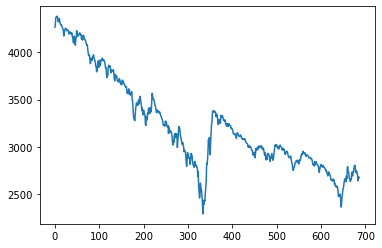

In [9]:
fig, ax = plt.subplots()
ax.plot('Open', data=sp500)
#ax.plot('Open', data=sp500.tail(1000))
plt.show()

In [13]:
l0, l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11 = list(),  list(), list(), list(), list(), list(), list(), list(), list(), list(), list(), list()
corr_btc_cur, corr_btc_df = list(),list()
corr_sp500_cur, corr_sp500_df = list(),list()
x = 2
for cnt, d in enumerate(rel_data): 
    #l0.append(d['market cap (USD)'].mean())
    l1.append(d.count(axis=0)[1])
    l2.append(d['open (USD)'].std())
    l3.append(d['open (USD)'].mean())
    
    std = d['spread'].std()
    mu = d['spread'].mean()
    l4.append(std)
    l5.append(mu)
    ss = 0
    for e in d['spread']:
        if (e > mu + x*std) or (e < mu - x*std):
            ss += 1
    l6.append(ss)
    l7.append(d.iat[0, 3] - d.iat[-1, 3])
    l8.append((d.iat[0, 3] - d.iat[-1, 3]) / d.count(axis=0)[1])
    c = time_corr(d, rel_data[currencies_list.index('BTC')])
    l9.append(c)
    if c < -0.5:
        corr_btc_cur.append(ouput_df.iloc[cnt, 0])
        corr_btc_df.append(d)
    
    c = time_corr(d, sp500, timestamp_b='Date', open_b='Open')
    l10.append(c)
    if c < -0.5:
        corr_sp500_cur.append(ouput_df.iloc[cnt, 0])
        corr_sp500_df.append(d)
    l11 = d['timestamp'][0]

for cnt, d in enumerate(data): 
    l0.append(d['market cap (USD)'].mean())
    
ouput_df['avg market cap'] = l0    
ouput_df['observations'] = l1
ouput_df['std'] = l2
ouput_df['mean'] = l3
ouput_df['spread std'] = l4
ouput_df['spread mean'] = l5
ouput_df['outlier (3std)'] = l6
ouput_df['profit'] = l7
ouput_df['avg profit per day'] = l8
ouput_df['corr to BTC'] = l9
ouput_df['corr to S&P500'] = l10
ouput_df['last timestamp'] = l11

ouput_df

,currency,avg market cap,observations,std,mean,spread std,spread mean,outlier (3std),profit,avg profit per day,corr to BTC,corr to S&P500,last timestamp
0,AAVE,2.729504e+05,319,0.408868,0.748561,0.090497,0.099929,14,0.847998,0.002658,0.867209,-0.466352,2021-08-29
1,ADA,3.395741e+08,1000,0.200444,0.124048,0.029143,0.013620,54,0.990450,0.000990,0.866764,0.870957,2021-08-29
2,AION,1.982685e+07,558,0.487724,0.738462,0.146535,0.112738,30,-0.268863,-0.000482,0.748787,0.543114,2021-08-29
3,ALGO,2.381161e+07,800,0.392735,0.534427,0.092300,0.068337,23,-2.290596,-0.002863,0.827043,0.000000,2021-08-29
4,ANT,1.037093e+06,382,0.473999,1.036584,0.416914,0.165080,2,-7.801270,-0.020422,0.626107,-0.053710,2021-08-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,XZC,1.243922e+05,294,0.246341,1.022063,0.108304,0.103729,9,-0.349436,-0.001189,0.820257,0.556759,2021-08-29
102,ZEC,2.007971e+05,893,0.344615,0.539639,0.076587,0.055809,31,0.622178,0.000697,0.854062,0.729765,2021-08-29
103,ZEN,2.252983e+05,420,0.453077,0.509073,0.093725,0.074634,26,0.915568,0.002180,0.801949,0.645409,2021-08-29
104,ZIL,2.473373e+08,923,0.474679,0.372840,0.087403,0.050552,46,0.831159,0.000900,0.954368,0.755597,2021-08-29


In [14]:
print('min obersations: {}'.format(ouput_df['observations'].min()))
print('max obersations: {}'.format(ouput_df['observations'].max()))

ouput_sorted = ouput_df.sort_values(['avg market cap', 'currency'], ascending=False)
ouput_sorted.head(10)

min obersations: 10
max obersations: 1000


,currency,avg market cap,observations,std,mean,spread std,spread mean,outlier (3std),profit,avg profit per day,corr to BTC,corr to S&P500,last timestamp
19,BTT,1.931792e+10,942,0.418694,0.295689,0.092605,0.039465,38,0.889736,0.000945,0.767270,0.690298,2021-08-29
29,DENT,4.169340e+09,734,0.486211,0.252999,0.119538,0.048873,39,0.922705,0.001257,0.776628,0.553845,2021-08-29
69,NPXS,3.972223e+09,602,0.176529,0.072023,0.040501,0.012012,24,0.960244,0.001595,-0.126762,0.498106,2021-08-29
32,DOGE,2.499914e+09,787,0.423497,0.211376,0.106799,0.036279,30,0.995804,0.001265,0.678198,0.746649,2021-08-29
91,VET,1.444081e+09,1000,0.375468,0.232901,0.076917,0.032679,36,0.966099,0.000966,0.849548,0.767490,2021-08-29
86,TRX,1.320684e+09,1000,0.310658,0.379360,0.056257,0.036536,45,0.843566,0.000844,0.851422,0.755329,2021-08-29
47,IOST,9.140612e+08,892,0.340894,0.318736,0.074087,0.042640,41,0.343537,0.000385,0.903548,0.696548,2021-08-29
78,SC,8.271520e+08,420,0.498946,0.539442,0.119504,0.080812,18,0.858353,0.002044,0.818128,0.441976,2021-08-29
61,MATIC,4.684646e+08,857,0.310141,0.152192,0.074125,0.024711,28,1.004444,0.001172,0.627773,0.780237,2021-08-29
98,XRP,4.080375e+08,1000,0.257430,0.352219,0.058633,0.036316,48,0.692747,0.000693,0.767218,0.718798,2021-08-29


Text(0, 0.5, 'Profit')

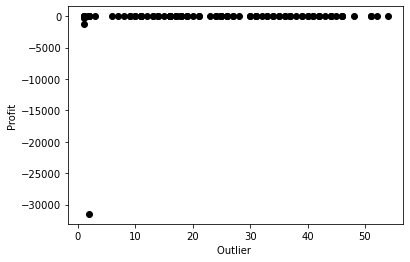

In [15]:
plt.scatter(ouput_df['outlier (3std)'], ouput_df['profit'], color='k')
plt.xlabel('Outlier ')
plt.ylabel('Profit')

In [18]:
print(currencies.loc[currencies['currency code'] == currencies_list[ouput_df['profit'].idxmin()]])
ouput_df_wo_ol = ouput_df.drop(ouput_df['profit'].idxmin(), axis=0)

print(currencies.loc[currencies['currency code'] == currencies_list[ouput_df_wo_ol['profit'].idxmin()]])
ouput_df_wo_ol = ouput_df_wo_ol.drop(ouput_df_wo_ol['profit'].idxmin(), axis=0)

print(currencies.loc[currencies['currency code'] == currencies_list[ouput_df_wo_ol['profit'].idxmin()]])
ouput_df_wo_ol = ouput_df_wo_ol.drop(ouput_df_wo_ol['profit'].idxmin(), axis=0)

print(currencies.loc[currencies['currency code'] == currencies_list[ouput_df_wo_ol['profit'].idxmin()]])
ouput_df_wo_ol = ouput_df_wo_ol.drop(ouput_df_wo_ol['profit'].idxmin(), axis=0)

print(currencies.loc[currencies['currency code'] == currencies_list[ouput_df_wo_ol['profit'].idxmin()]])
ouput_df_wo_ol = ouput_df_wo_ol.drop(ouput_df_wo_ol['profit'].idxmin(), axis=0)

print('average profit: {}'.format(ouput_df_wo_ol['profit'].mean()))

    currency code currency name
501           VEN       VeChain
    currency code currency name
288           MCO        Monaco
   currency code currency name
95          BUSD   Binance-USD
   currency code currency name
26           ANT        Aragon
    currency code currency name
193           FIL      Filecoin
average profit: 0.42823286526629445


Coefficients: 
 [[0.02423487]]


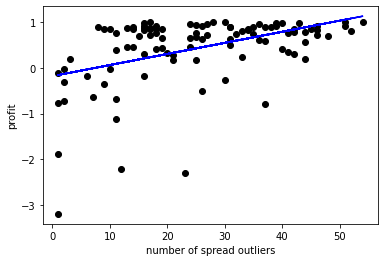

In [19]:
#data = pd.read_csv('data.csv')  # load data set
x = ouput_df_wo_ol['outlier (3std)'].values.reshape(-1, 1)
y = ouput_df_wo_ol['profit'].values.reshape(-1, 1)

linear_regressor = lm.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

print('Coefficients: \n', linear_regressor.coef_)
plt.scatter(x, y, color='k')
plt.plot(x, y_pred, color='b')
plt.xlabel('number of spread outliers')
plt.ylabel('profit')
plt.savefig(pathToSave.format('outlier_profit'))
plt.show()


Coefficients: 
 [[0.00016828]]


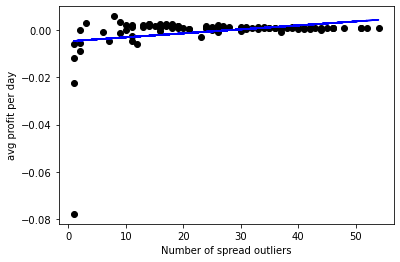

In [20]:
#data = pd.read_csv('data.csv')  # load data set
x = ouput_df_wo_ol['outlier (3std)'].values.reshape(-1, 1)
y = ouput_df_wo_ol['avg profit per day'].values.reshape(-1, 1)

linear_regressor = lm.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

print('Coefficients: \n', linear_regressor.coef_)
plt.scatter(x, y, color='k')
plt.plot(x, y_pred, color='b')
plt.xlabel('Number of spread outliers')
plt.ylabel('avg profit per day')
plt.savefig(pathToSave.format('outlier_profit_per_day'))
plt.show()


Coefficients: 
 [[-4.10339849e-12]]


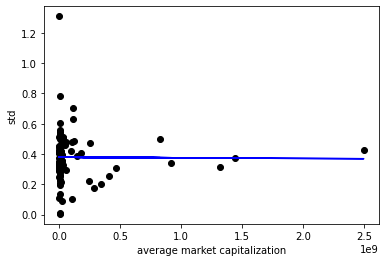

In [21]:
ouput_df_wo_olx = ouput_df_wo_ol.drop(ouput_df_wo_ol['avg market cap'].idxmax(), axis=0)
ouput_df_wo_olx = ouput_df_wo_olx.drop(ouput_df_wo_olx['avg market cap'].idxmax(), axis=0)
ouput_df_wo_olx = ouput_df_wo_olx.drop(ouput_df_wo_olx['avg market cap'].idxmax(), axis=0)
#ouput_df_wo_olx = ouput_df_wo_ol.drop(ouput_df_wo_olx['profit'].idxmax(), axis=0)
#ouput_df_wo_olx = ouput_df_wo_ol.drop(ouput_df_wo_olx['profit'].idxmax(), axis=0)
#ouput_df_wo_olx = ouput_df_wo_ol.drop(ouput_df_wo_olx['profit'].idxmax(), axis=0)
#plt.scatter(ouput_df_wo_olx['avg market cap'], ouput_df_wo_olx['std'], color='k')
#plt.scatter(ouput_df['avg market cap'], ouput_df['std'], color='k')
#plt.xlabel('Average market capitalisation')
#plt.ylabel('Profit')

#data = pd.read_csv('data.csv')  # load data set
x = ouput_df_wo_olx['avg market cap'].values.reshape(-1, 1)
y = ouput_df_wo_olx['std'].values.reshape(-1, 1)

linear_regressor = lm.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

print('Coefficients: \n', linear_regressor.coef_)
plt.scatter(x, y, color='k')
plt.plot(x, y_pred, color='b')
plt.xlabel('average market capitalization')
plt.ylabel('std')
plt.savefig(pathToSave.format('std_market_cap'))
plt.show()

Text(0, 0.5, 'Profit')

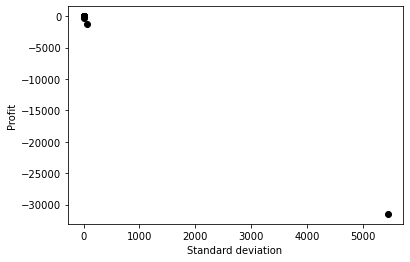

In [22]:
plt.scatter(ouput_df['std'], ouput_df['profit'], color='k')
plt.xlabel('Standard deviation ')
plt.ylabel('Profit')

Coefficients: 
 [[-0.30888168]]


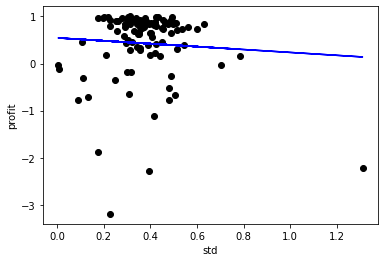

In [23]:
#data = pd.read_csv('data.csv')  # load data set
x = ouput_df_wo_ol['std'].values.reshape(-1, 1)
y = ouput_df_wo_ol['profit'].values.reshape(-1, 1)

linear_regressor = lm.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

print('Coefficients: \n', linear_regressor.coef_)
plt.scatter(x, y, color='k')
plt.plot(x, y_pred, color='b')
plt.xlabel('std')
plt.ylabel('profit')
plt.savefig(pathToSave.format('std_profit'))
plt.show()

Coefficients: 
 [[0.01155078]]


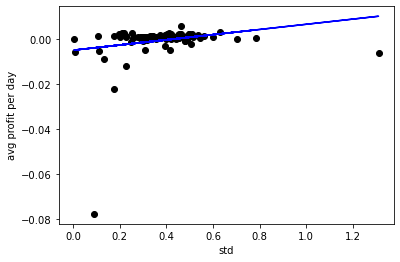

In [24]:
#data = pd.read_csv('data.csv')  # load data set
x = ouput_df_wo_ol['std'].values.reshape(-1, 1)
y = ouput_df_wo_ol['avg profit per day'].values.reshape(-1, 1)

linear_regressor = lm.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

print('Coefficients: \n', linear_regressor.coef_)
plt.scatter(x, y, color='k')
plt.plot(x, y_pred, color='b')
plt.xlabel('std')
plt.ylabel('avg profit per day')
plt.savefig(pathToSave.format('std_profit_per_day'))
plt.show()

Text(0, 0.5, 'Profit')

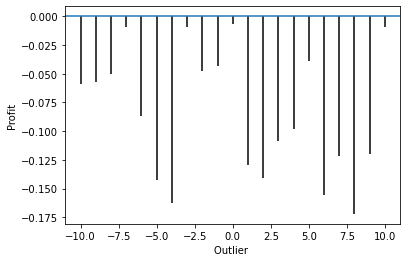

In [25]:
plt.xcorr(ouput_df['outlier (3std)'], ouput_df['profit'])
plt.xlabel('Outlier ')
plt.ylabel('Profit')

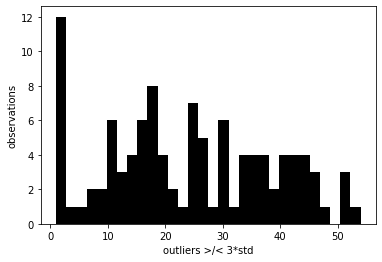

In [26]:
plt.hist(ouput_df['outlier (3std)'], bins=30, color='k')
plt.xlabel('outliers >/< 3*std')
plt.ylabel('observations')
plt.savefig(pathToSave.format('hist_outlier'))
plt.show()

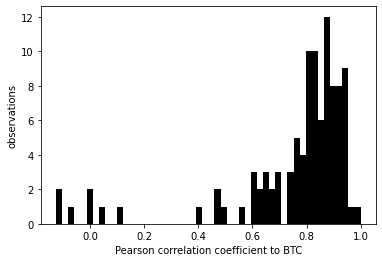

In [27]:
plt.hist(ouput_df['corr to BTC'],bins=50, color='k')
plt.xlabel('Pearson correlation coefficient to BTC')
plt.ylabel('observations')
plt.savefig(pathToSave.format('hist_corr_BTC'))
plt.show()

In [28]:
print(corr_btc_cur)
ouput_df.loc[ouput_df['currency'] == corr_btc_cur[0]]

[]


IndexError: list index out of range

In [ ]:
data_STRAT = pd.read_csv('cy_data/STRAT.csv')
data_STRAT.head(10)

In [ ]:
plt.hist(ouput_df['corr to S&P500'],bins=50, color='k') 
plt.xlabel('Pearson correlation coefficient to S&P500')
plt.ylabel('observations')
#plt.savefig(pathToSave.format('hist_corr_SP500'))
plt.show()

In [ ]:
print(corr_sp500_cur)
ouput_df.loc[ouput_df['currency'].isin(corr_sp500_cur)]

In [ ]:
used_currencies = currencies.loc[currencies['currency code'].isin(currencies_list)]
used_currencies.to_csv('{}.csv'.format('used_currencies'), encoding='utf-8')
ouput_df.to_csv('{}.csv'.format('output'), encoding='utf-8')

In [ ]:
# https://www.alphavantage.co/documentation/#currency-daily
CSV_URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=GRT&datatype=csv&market=USD&apikey=E7BF5XXE8WRMMDOD'
download = requests.Session().get(CSV_URL).content
grt = pd.read_csv(io.StringIO(download.decode('utf-8')))
grt

In [ ]:
rel_sp500 = sp500.copy() 
print(sp500)
for d in rel_sp500: 
    start = d.iat[0, 3]
    #df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    d['Open'] /= start
rel_data[0]

In [ ]:
btc_strat = pd.read_csv('BTC_STRAT.csv') 
btc_strat.head()


In [ ]:
ss = btc_strat['STRAT'][0]
btc_strat['STRAT'] /= ss

bs = btc_strat['BTC'][0]
btc_strat['BTC'] /= bs
btc_strat.head()

In [ ]:
#btc_strat = btc_strat.iloc[::-1]
ax =  btc_strat.plot(color=['k','b'])
ax.set_xlabel("time")
#ax.set_xticklabels(['a', 'b'])
ax.set_xticklabels([btc_strat['timestamp'][0], btc_strat['timestamp'][2]])
ax.set_ylabel("normalized opening price")
ax.figure.savefig('diagrams/btc_stat.png')

